# Parameter-Efficient Fine-Tuning Comparison
## Baseline vs LoRA vs QLoRA on DistilBERT / SST-2

**Model:** DistilBERT-base-uncased (67M params)  
**Dataset:** SST-2 Sentiment Classification  
**GPU:** NVIDIA RTX A6000  
**Epochs:** 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Style setup
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [2]:
# ============== ALL EXPERIMENT DATA ==============

# Baseline (full fine-tuning)
baseline = {
    'method': 'Baseline',
    'rank': None,
    'accuracy': 91.86,
    'eval_loss': 0.4084,
    'wall_clock_s': 518.2,
    'throughput': 389.9,
    'mem_torch_mb': 1305.9,
    'trainable_params': 66955010,
    'total_params': 66955010,
    'batch_size': 8,
}

# LoRA results
lora_data = [
    {'rank': 4, 'accuracy': 87.84, 'mem_torch_mb': 810.0, 'throughput': 1413.6, 'trainable_params': 665858, 'total_params': 67620868},
    {'rank': 8, 'accuracy': 87.84, 'mem_torch_mb': 811.2, 'throughput': 1411.2, 'trainable_params': 739586, 'total_params': 67694596},
    {'rank': 16, 'accuracy': 87.96, 'mem_torch_mb': 813.7, 'throughput': 1392.6, 'trainable_params': 887042, 'total_params': 67842052},
    {'rank': 32, 'accuracy': 87.96, 'mem_torch_mb': 818.6, 'throughput': 1395.9, 'trainable_params': 1181954, 'total_params': 68136964},
]

# QLoRA results
qlora_data = [
    {'rank': 4, 'accuracy': 87.73, 'mem_torch_mb': 687.0, 'throughput': 1095.1, 'trainable_params': 1256450, 'total_params': 47568388},
    {'rank': 8, 'accuracy': 88.07, 'mem_torch_mb': 688.2, 'throughput': 1114.9, 'trainable_params': 1330178, 'total_params': 47642116},
    {'rank': 16, 'accuracy': 87.96, 'mem_torch_mb': 690.6, 'throughput': 1136.2, 'trainable_params': 1477634, 'total_params': 47789572},
    {'rank': 32, 'accuracy': 88.19, 'mem_torch_mb': 695.6, 'throughput': 1091.2, 'trainable_params': 1772546, 'total_params': 48084484},
]

# Add method labels and compute derived metrics
for d in lora_data:
    d['method'] = 'LoRA'
    d['trainable_pct'] = d['trainable_params'] / d['total_params'] * 100
    d['param_efficiency'] = d['accuracy'] / (d['trainable_params'] / 1e6)  # acc per 1M params

for d in qlora_data:
    d['method'] = 'QLoRA'
    d['trainable_pct'] = d['trainable_params'] / d['total_params'] * 100
    d['param_efficiency'] = d['accuracy'] / (d['trainable_params'] / 1e6)

baseline['trainable_pct'] = 100.0
baseline['param_efficiency'] = baseline['accuracy'] / (baseline['trainable_params'] / 1e6)

# Create DataFrames
df_lora = pd.DataFrame(lora_data)
df_qlora = pd.DataFrame(qlora_data)

print("Baseline:")
print(f"  Accuracy: {baseline['accuracy']}%")
print(f"  Memory: {baseline['mem_torch_mb']} MB")
print(f"  Trainable: {baseline['trainable_params']:,} (100%)")
print()
print("LoRA Summary:")
print(df_lora[['rank', 'accuracy', 'mem_torch_mb', 'trainable_params', 'trainable_pct']].to_string(index=False))
print()
print("QLoRA Summary:")
print(df_qlora[['rank', 'accuracy', 'mem_torch_mb', 'trainable_params', 'trainable_pct']].to_string(index=False))

Baseline:
  Accuracy: 91.86%
  Memory: 1305.9 MB
  Trainable: 66,955,010 (100%)

LoRA Summary:
 rank  accuracy  mem_torch_mb  trainable_params  trainable_pct
    4     87.84         810.0            665858       0.984693
    8     87.84         811.2            739586       1.092533
   16     87.96         813.7            887042       1.307511
   32     87.96         818.6           1181954       1.734674

QLoRA Summary:
 rank  accuracy  mem_torch_mb  trainable_params  trainable_pct
    4     87.73         687.0           1256450       2.641355
    8     88.07         688.2           1330178       2.792021
   16     87.96         690.6           1477634       3.091959
   32     88.19         695.6           1772546       3.686316


In [3]:
# Color scheme
COLORS = {
    'baseline': '#1e3a5f',
    'lora': '#2563eb',
    'qlora': '#dc2626',
    'gray': '#6b7280',
}

LORA_SHADES = ['#93c5fd', '#60a5fa', '#3b82f6', '#2563eb']
QLORA_SHADES = ['#fca5a5', '#f87171', '#ef4444', '#dc2626']

---
## 1. Accuracy Comparison (Headline Result)

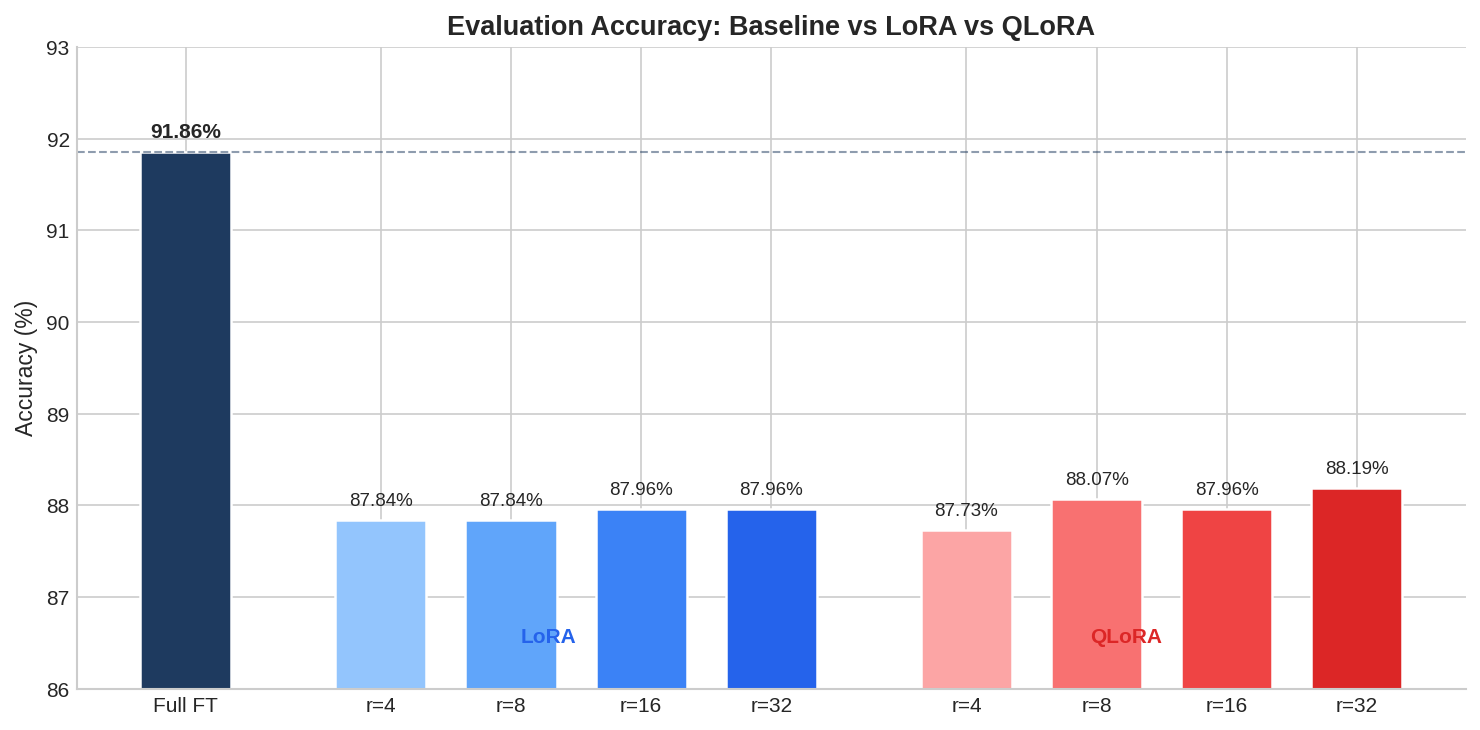

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

# X positions
x_baseline = 0
x_lora = np.array([1.5, 2.5, 3.5, 4.5])
x_qlora = np.array([6, 7, 8, 9])

bar_width = 0.7

# Bars
ax.bar(x_baseline, baseline['accuracy'], width=bar_width, color=COLORS['baseline'], edgecolor='white', linewidth=1.2, label='Baseline')
ax.bar(x_lora, df_lora['accuracy'], width=bar_width, color=LORA_SHADES, edgecolor='white', linewidth=1.2)
ax.bar(x_qlora, df_qlora['accuracy'], width=bar_width, color=QLORA_SHADES, edgecolor='white', linewidth=1.2)

# Value labels
ax.annotate(f"{baseline['accuracy']:.2f}%", xy=(x_baseline, baseline['accuracy']), xytext=(0, 5),
            textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
for xi, val in zip(x_lora, df_lora['accuracy']):
    ax.annotate(f'{val:.2f}%', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)
for xi, val in zip(x_qlora, df_qlora['accuracy']):
    ax.annotate(f'{val:.2f}%', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)

# Baseline reference line
ax.axhline(y=baseline['accuracy'], color=COLORS['baseline'], linestyle='--', alpha=0.5, linewidth=1)

# Labels
ax.set_ylabel('Accuracy (%)')
ax.set_title('Evaluation Accuracy: Baseline vs LoRA vs QLoRA')
ax.set_xticks([x_baseline] + list(x_lora) + list(x_qlora))
ax.set_xticklabels(['Full FT'] + [f'r={r}' for r in df_lora['rank']] + [f'r={r}' for r in df_qlora['rank']])
ax.set_ylim(86, 93)

# Group labels
ax.text(x_baseline, 86.5, 'Baseline', ha='center', fontsize=10, fontweight='bold', color=COLORS['baseline'])
ax.text(np.mean(x_lora), 86.5, 'LoRA', ha='right', fontsize=10, fontweight='bold', color=COLORS['lora'])
ax.text(np.mean(x_qlora), 86.5, 'QLoRA', ha='right', fontsize=10, fontweight='bold', color=COLORS['qlora'])

# Accuracy gap annotation
# ax.annotate('', xy=(4.5, 87.96), xytext=(4.5, 91.86),
#             arrowprops=dict(arrowstyle='<->', color=COLORS['gray'], lw=1.5))
# ax.text(5.1, 89.9, 'Δ = 3.9%', fontsize=9, color=COLORS['gray'])

plt.tight_layout()
plt.savefig('accuracy_comparison.png')
plt.show()

---
## 2. Memory Comparison

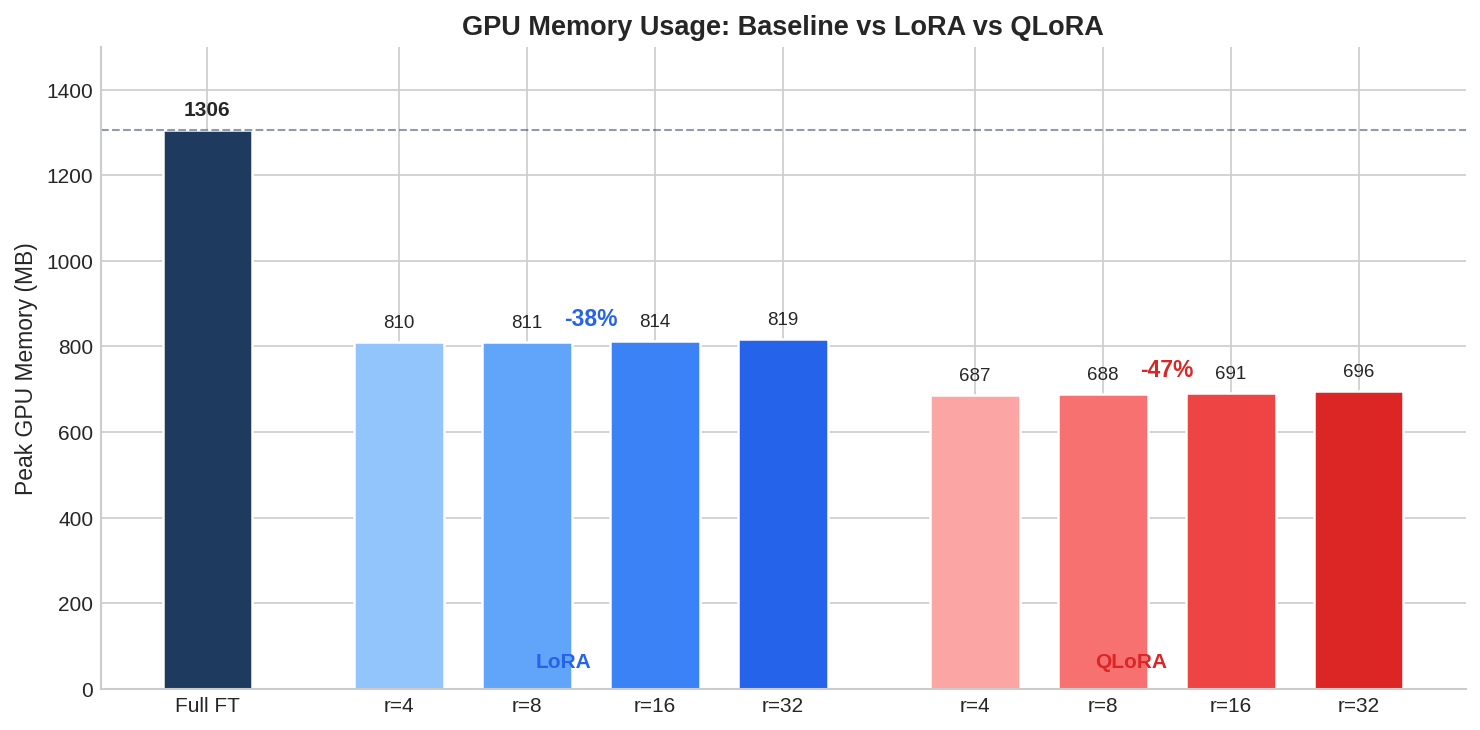

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

# Bars
ax.bar(x_baseline, baseline['mem_torch_mb'], width=bar_width, color=COLORS['baseline'], edgecolor='white', linewidth=1.2)
ax.bar(x_lora, df_lora['mem_torch_mb'], width=bar_width, color=LORA_SHADES, edgecolor='white', linewidth=1.2)
ax.bar(x_qlora, df_qlora['mem_torch_mb'], width=bar_width, color=QLORA_SHADES, edgecolor='white', linewidth=1.2)

# Value labels
ax.annotate(f"{baseline['mem_torch_mb']:.0f}", xy=(x_baseline, baseline['mem_torch_mb']), xytext=(0, 5),
            textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
for xi, val in zip(x_lora, df_lora['mem_torch_mb']):
    ax.annotate(f'{val:.0f}', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)
for xi, val in zip(x_qlora, df_qlora['mem_torch_mb']):
    ax.annotate(f'{val:.0f}', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)

# Baseline reference line
ax.axhline(y=baseline['mem_torch_mb'], color=COLORS['baseline'], linestyle='--', alpha=0.5, linewidth=1)

# Memory savings annotations
lora_saving = (1 - df_lora['mem_torch_mb'].mean() / baseline['mem_torch_mb']) * 100
qlora_saving = (1 - df_qlora['mem_torch_mb'].mean() / baseline['mem_torch_mb']) * 100

ax.text(np.mean(x_lora), 850, f'-{lora_saving:.0f}%', ha='center', fontsize=11, fontweight='bold', color=COLORS['lora'])
ax.text(np.mean(x_qlora), 730, f'-{qlora_saving:.0f}%', ha='center', fontsize=11, fontweight='bold', color=COLORS['qlora'])

ax.set_ylabel('Peak GPU Memory (MB)')
ax.set_title('GPU Memory Usage: Baseline vs LoRA vs QLoRA')
ax.set_xticks([x_baseline] + list(x_lora) + list(x_qlora))
ax.set_xticklabels(['Full FT'] + [f'r={r}' for r in df_lora['rank']] + [f'r={r}' for r in df_qlora['rank']])
ax.set_ylim(0, 1500)

# Group labels
ax.text(x_baseline, 50, 'Baseline', ha='center', fontsize=10, fontweight='bold', color=COLORS['baseline'])
ax.text(np.mean(x_lora), 50, 'LoRA', ha='right', fontsize=10, fontweight='bold', color=COLORS['lora'])
ax.text(np.mean(x_qlora), 50, 'QLoRA', ha='right', fontsize=10, fontweight='bold', color=COLORS['qlora'])

plt.tight_layout()
plt.savefig('memory_comparison.png')
plt.show()

---
## 3. Accuracy vs Memory Scatter (Pareto Tradeoff)

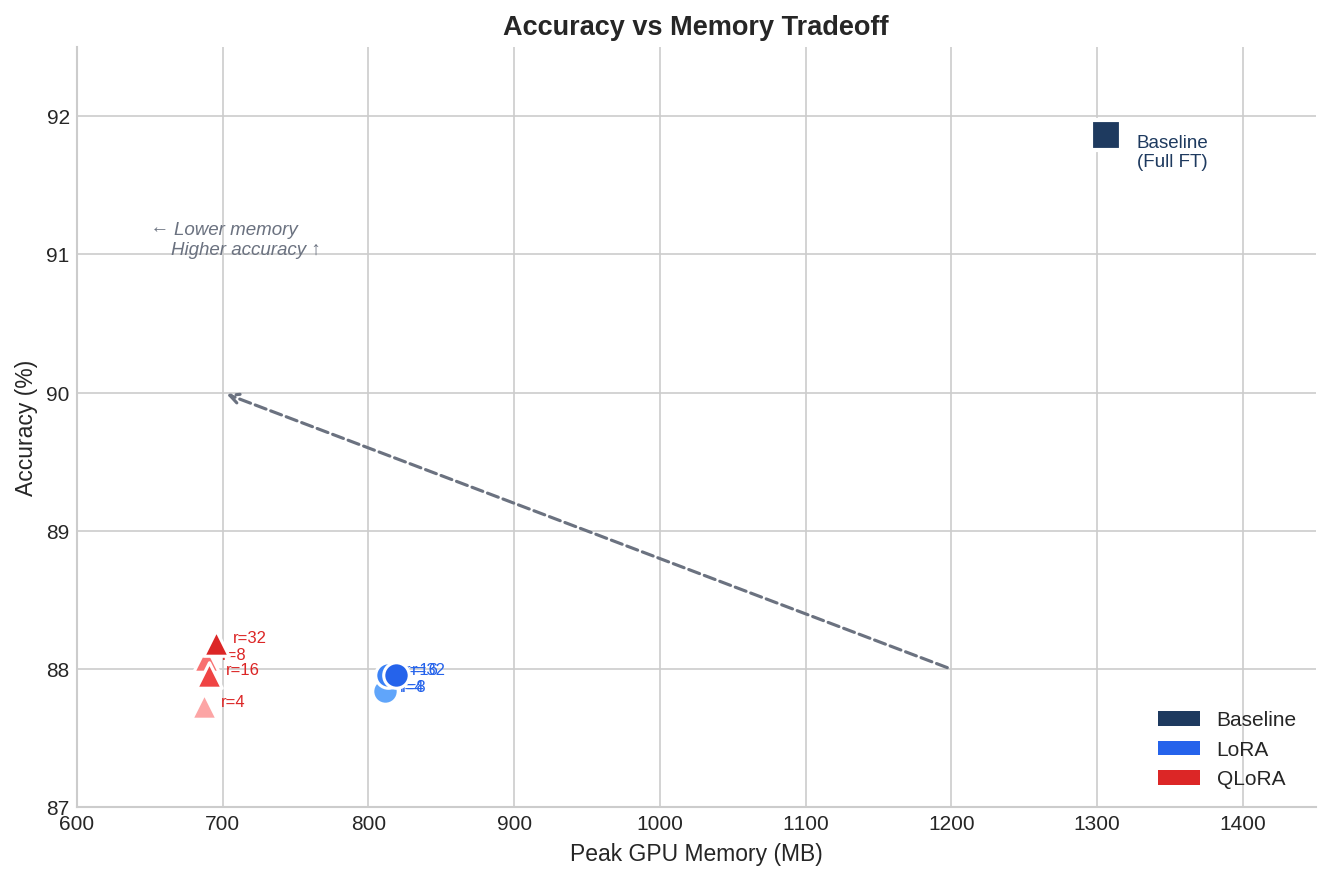

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

# Baseline point
ax.scatter(baseline['mem_torch_mb'], baseline['accuracy'], s=200, c=COLORS['baseline'],
           marker='s', edgecolors='white', linewidths=2, zorder=5, label='Baseline')
ax.annotate('Baseline\n(Full FT)', xy=(baseline['mem_torch_mb'], baseline['accuracy']),
            xytext=(15, -15), textcoords='offset points', fontsize=9, color=COLORS['baseline'])

# LoRA points
for i, row in df_lora.iterrows():
    ax.scatter(row['mem_torch_mb'], row['accuracy'], s=150, c=LORA_SHADES[i],
               marker='o', edgecolors='white', linewidths=1.5, zorder=4)
    ax.annotate(f"r={row['rank']}", xy=(row['mem_torch_mb'], row['accuracy']),
                xytext=(8, 0), textcoords='offset points', fontsize=8, color=COLORS['lora'])

# QLoRA points
for i, row in df_qlora.iterrows():
    ax.scatter(row['mem_torch_mb'], row['accuracy'], s=150, c=QLORA_SHADES[i],
               marker='^', edgecolors='white', linewidths=1.5, zorder=4)
    ax.annotate(f"r={row['rank']}", xy=(row['mem_torch_mb'], row['accuracy']),
                xytext=(8, 0), textcoords='offset points', fontsize=8, color=COLORS['qlora'])

# Ideal region annotation
ax.annotate('← Lower memory\n    Higher accuracy ↑',
            xy=(650, 91), fontsize=9, color=COLORS['gray'], style='italic')

# Arrow showing tradeoff direction
ax.annotate('', xy=(700, 90), xytext=(1200, 88),
            arrowprops=dict(arrowstyle='->', color=COLORS['gray'], lw=1.5, ls='--'))

ax.set_xlabel('Peak GPU Memory (MB)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy vs Memory Tradeoff')
ax.set_xlim(600, 1450)
ax.set_ylim(87, 92.5)

# Legend
legend_elements = [
    Patch(facecolor=COLORS['baseline'], label='Baseline'),
    Patch(facecolor=COLORS['lora'], label='LoRA'),
    Patch(facecolor=COLORS['qlora'], label='QLoRA'),
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('accuracy_vs_memory_scatter.png')
plt.show()

---
## 4. Trainable Parameters Comparison

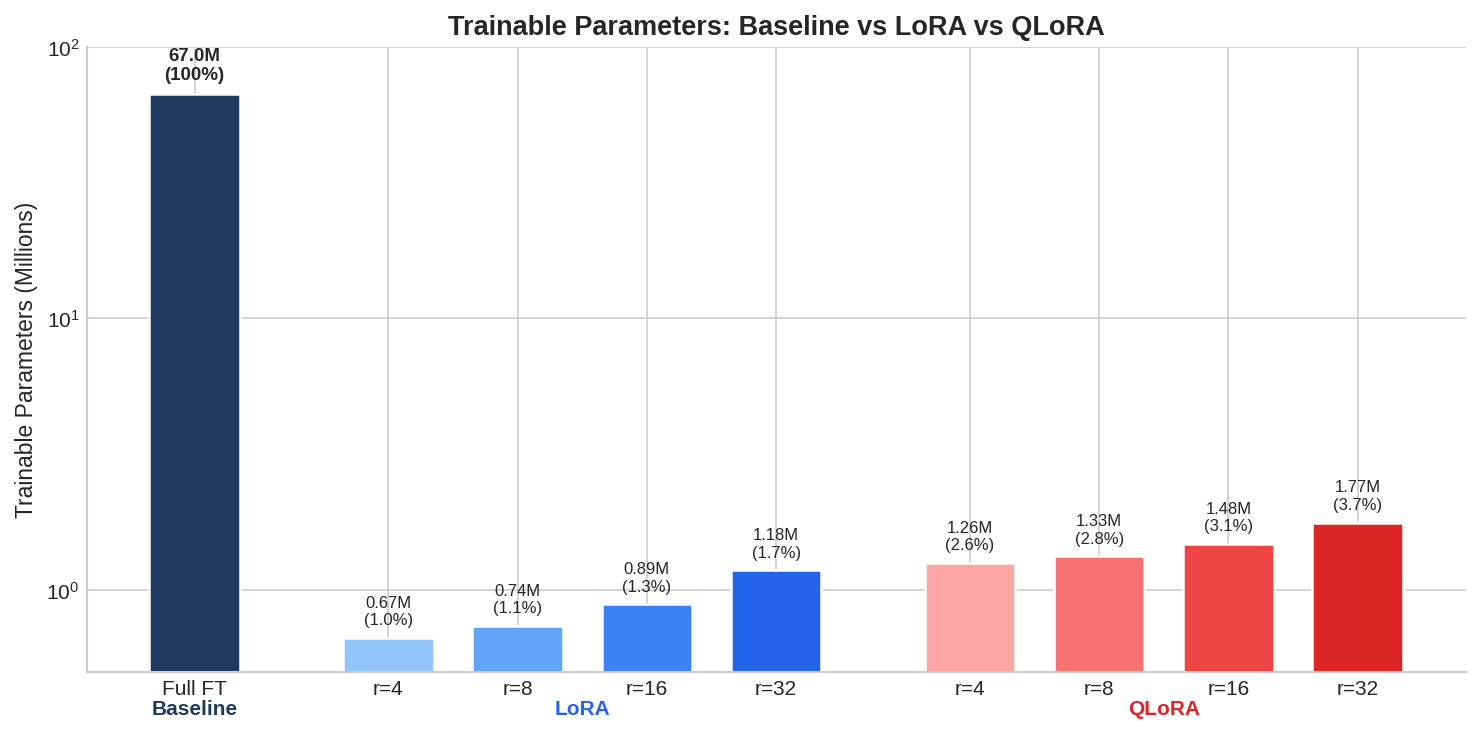

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Use log scale for params since baseline is 67M vs ~1M for PEFT
ax.bar(x_baseline, baseline['trainable_params'] / 1e6, width=bar_width, color=COLORS['baseline'], edgecolor='white', linewidth=1.2)
ax.bar(x_lora, df_lora['trainable_params'] / 1e6, width=bar_width, color=LORA_SHADES, edgecolor='white', linewidth=1.2)
ax.bar(x_qlora, df_qlora['trainable_params'] / 1e6, width=bar_width, color=QLORA_SHADES, edgecolor='white', linewidth=1.2)

# Value labels
ax.annotate(f"67.0M\n(100%)", xy=(x_baseline, baseline['trainable_params'] / 1e6), xytext=(0, 5),
            textcoords='offset points', ha='center', va='bottom', fontsize=9, fontweight='bold')
for xi, row in zip(x_lora, lora_data):
    ax.annotate(f"{row['trainable_params']/1e6:.2f}M\n({row['trainable_pct']:.1f}%)",
                xy=(xi, row['trainable_params'] / 1e6), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)
for xi, row in zip(x_qlora, qlora_data):
    ax.annotate(f"{row['trainable_params']/1e6:.2f}M\n({row['trainable_pct']:.1f}%)",
                xy=(xi, row['trainable_params'] / 1e6), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Trainable Parameters (Millions)')
ax.set_title('Trainable Parameters: Baseline vs LoRA vs QLoRA')
ax.set_xticks([x_baseline] + list(x_lora) + list(x_qlora))
ax.set_xticklabels(['Full FT'] + [f'r={r}' for r in df_lora['rank']] + [f'r={r}' for r in df_qlora['rank']])
ax.set_yscale('log')
ax.set_ylim(0.5, 100)

# Group labels
ax.text(x_baseline, 0.35, 'Baseline', ha='center', fontsize=10, fontweight='bold', color=COLORS['baseline'])
ax.text(np.mean(x_lora), 0.35, 'LoRA', ha='center', fontsize=10, fontweight='bold', color=COLORS['lora'])
ax.text(np.mean(x_qlora), 0.35, 'QLoRA', ha='center', fontsize=10, fontweight='bold', color=COLORS['qlora'])

plt.tight_layout()
plt.savefig('trainable_params_comparison.png')
plt.show()

---
## 5. Parameter Efficiency (Accuracy per 1M Params)

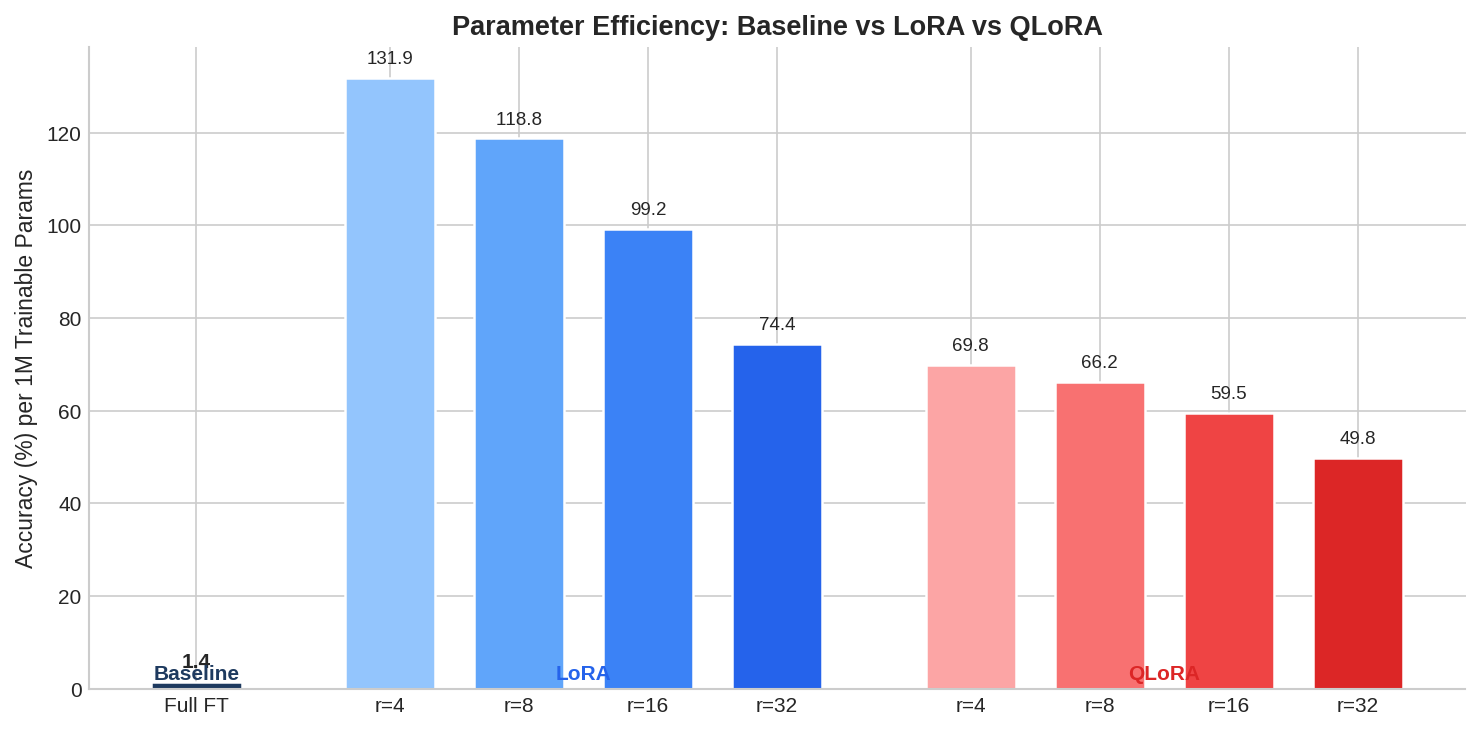

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

# Compute efficiency for all
baseline_eff = baseline['accuracy'] / (baseline['trainable_params'] / 1e6)
lora_eff = df_lora['accuracy'] / (df_lora['trainable_params'] / 1e6)
qlora_eff = df_qlora['accuracy'] / (df_qlora['trainable_params'] / 1e6)

ax.bar(x_baseline, baseline_eff, width=bar_width, color=COLORS['baseline'], edgecolor='white', linewidth=1.2)
ax.bar(x_lora, lora_eff, width=bar_width, color=LORA_SHADES, edgecolor='white', linewidth=1.2)
ax.bar(x_qlora, qlora_eff, width=bar_width, color=QLORA_SHADES, edgecolor='white', linewidth=1.2)

# Value labels
ax.annotate(f"{baseline_eff:.1f}", xy=(x_baseline, baseline_eff), xytext=(0, 5),
            textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
for xi, val in zip(x_lora, lora_eff):
    ax.annotate(f'{val:.1f}', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)
for xi, val in zip(x_qlora, qlora_eff):
    ax.annotate(f'{val:.1f}', xy=(xi, val), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Accuracy (%) per 1M Trainable Params')
ax.set_title('Parameter Efficiency: Baseline vs LoRA vs QLoRA')
ax.set_xticks([x_baseline] + list(x_lora) + list(x_qlora))
ax.set_xticklabels(['Full FT'] + [f'r={r}' for r in df_lora['rank']] + [f'r={r}' for r in df_qlora['rank']])

# Group labels
ax.text(x_baseline, 2, 'Baseline', ha='center', fontsize=10, fontweight='bold', color=COLORS['baseline'])
ax.text(np.mean(x_lora), 2, 'LoRA', ha='center', fontsize=10, fontweight='bold', color=COLORS['lora'])
ax.text(np.mean(x_qlora), 2, 'QLoRA', ha='center', fontsize=10, fontweight='bold', color=COLORS['qlora'])


plt.tight_layout()
plt.savefig('parameter_efficiency.png')
plt.show()

---
## 6. Radar Chart (Multi-Metric Comparison)

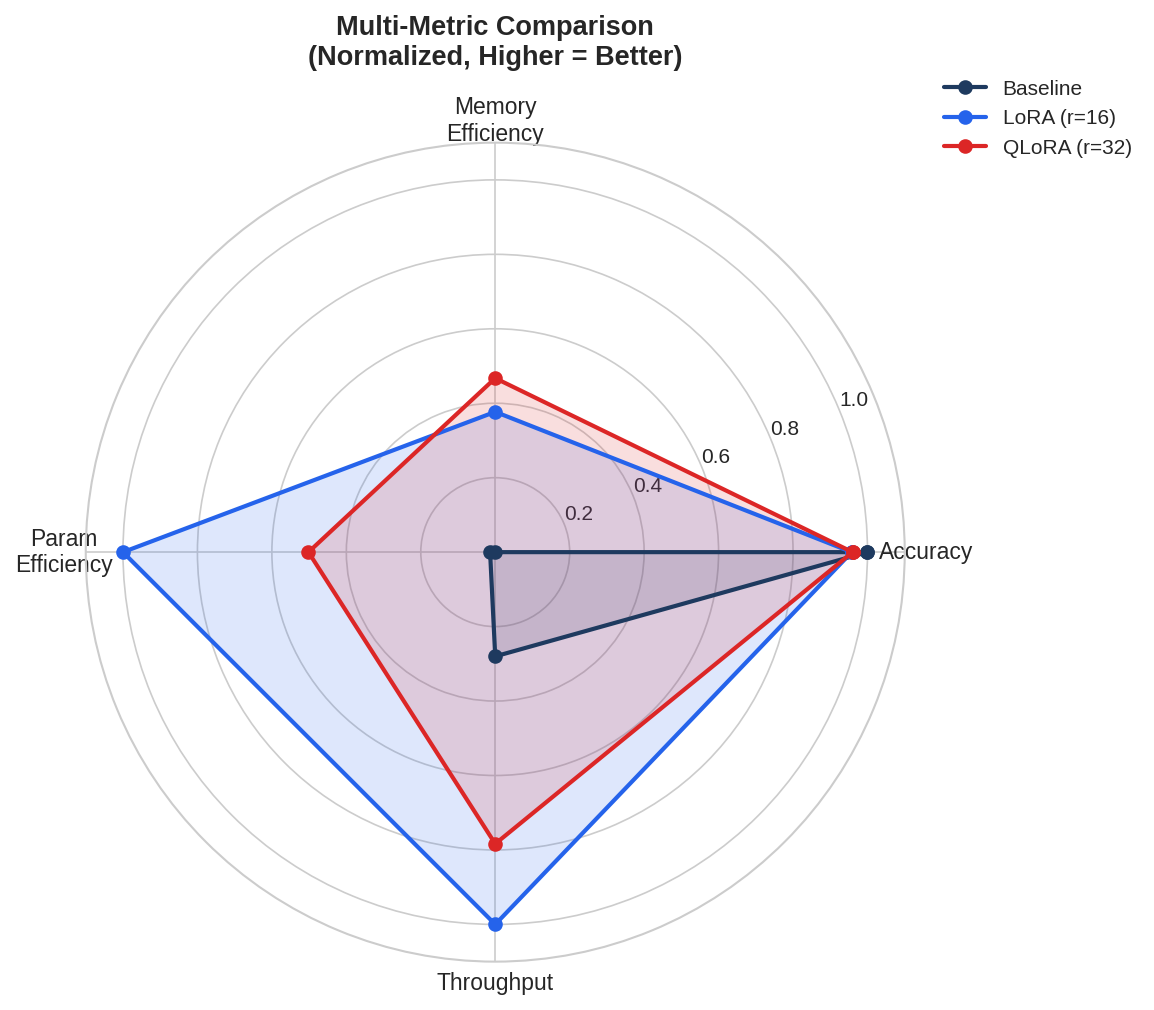

In [ ]:
from math import pi

# Best configs for comparison
best_lora = df_lora[df_lora['accuracy'] == df_lora['accuracy'].max()].iloc[0]  # r=16
best_qlora = df_qlora[df_qlora['accuracy'] == df_qlora['accuracy'].max()].iloc[0]  # r=32

# Metrics to compare (normalized 0-1, higher is better)
categories = ['Accuracy', 'Memory\nEfficiency', 'Param\nEfficiency', 'Throughput']
N = len(categories)

# Normalize metrics (scale so higher = better)
max_acc = baseline['accuracy']
max_mem = baseline['mem_torch_mb']
max_throughput = max(baseline['throughput'], best_lora['throughput'], best_qlora['throughput'])
max_param_eff = max(baseline['param_efficiency'], best_lora['param_efficiency'], best_qlora['param_efficiency'])

# Baseline values
baseline_vals = [
    baseline['accuracy'] / max_acc,
    1 - (baseline['mem_torch_mb'] / max_mem),  # invert: lower mem = higher score
    baseline['param_efficiency'] / max_param_eff,
    baseline['throughput'] / max_throughput,
]

# LoRA values
lora_vals = [
    best_lora['accuracy'] / max_acc,
    1 - (best_lora['mem_torch_mb'] / max_mem),
    best_lora['param_efficiency'] / max_param_eff,
    best_lora['throughput'] / max_throughput,
]

# QLoRA values
qlora_vals = [
    best_qlora['accuracy'] / max_acc,
    1 - (best_qlora['mem_torch_mb'] / max_mem),
    best_qlora['param_efficiency'] / max_param_eff,
    best_qlora['throughput'] / max_throughput,
]

# Radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # close the polygon

baseline_vals += baseline_vals[:1]
lora_vals += lora_vals[:1]
qlora_vals += qlora_vals[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each method
ax.plot(angles, baseline_vals, 'o-', linewidth=2, color=COLORS['baseline'], label='Baseline')
ax.fill(angles, baseline_vals, alpha=0.15, color=COLORS['baseline'])

ax.plot(angles, lora_vals, 'o-', linewidth=2, color=COLORS['lora'], label='LoRA (r=16)')
ax.fill(angles, lora_vals, alpha=0.15, color=COLORS['lora'])

ax.plot(angles, qlora_vals, 'o-', linewidth=2, color=COLORS['qlora'], label='QLoRA (r=32)')
ax.fill(angles, qlora_vals, alpha=0.15, color=COLORS['qlora'])

# Labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 1.1)
ax.set_title('Multi-Metric Comparison\n(Normalized, Higher = Better)', fontsize=13, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.savefig('radar_comparison.png')
plt.show()

---
## 7. Summary Bar Chart (Best of Each Method)

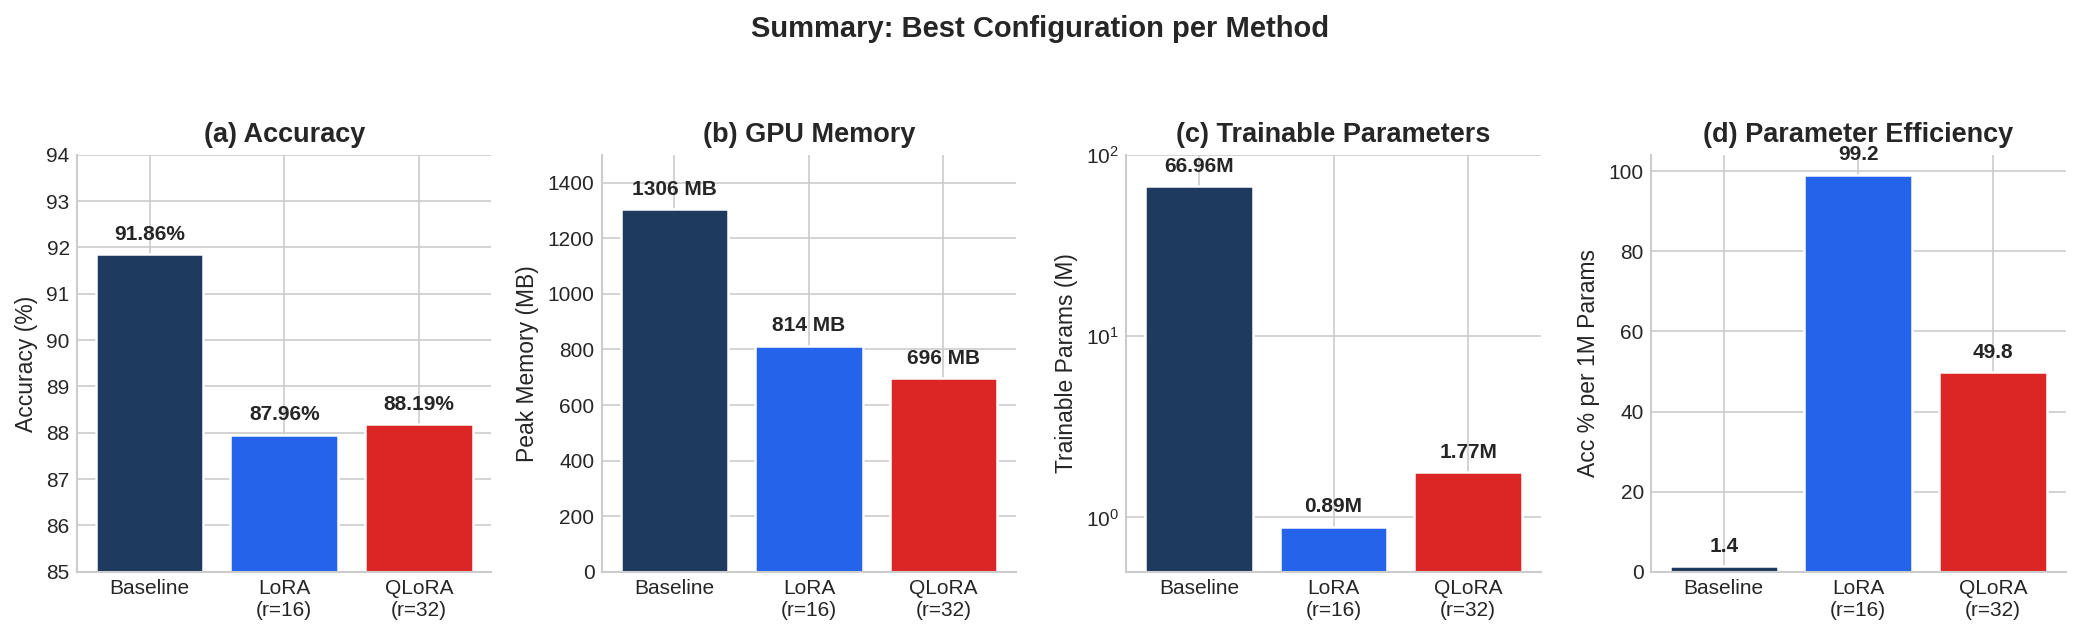

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

methods = ['Baseline', 'LoRA\n(r=16)', 'QLoRA\n(r=32)']
colors = [COLORS['baseline'], COLORS['lora'], COLORS['qlora']]
x = np.arange(3)

# (a) Accuracy
ax = axes[0]
vals = [baseline['accuracy'], best_lora['accuracy'], best_qlora['accuracy']]
bars = ax.bar(x, vals, color=colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, vals):
    ax.annotate(f'{val:.2f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.set_ylabel('Accuracy (%)')
ax.set_title('(a) Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylim(85, 94)

# (b) Memory
ax = axes[1]
vals = [baseline['mem_torch_mb'], best_lora['mem_torch_mb'], best_qlora['mem_torch_mb']]
bars = ax.bar(x, vals, color=colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, vals):
    ax.annotate(f'{val:.0f} MB', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.set_ylabel('Peak Memory (MB)')
ax.set_title('(b) GPU Memory')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylim(0, 1500)

# (c) Trainable Params
ax = axes[2]
vals = [baseline['trainable_params']/1e6, best_lora['trainable_params']/1e6, best_qlora['trainable_params']/1e6]
bars = ax.bar(x, vals, color=colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, vals):
    ax.annotate(f'{val:.2f}M', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.set_ylabel('Trainable Params (M)')
ax.set_title('(c) Trainable Parameters')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_yscale('log')
ax.set_ylim(0.5, 100)

# (d) Parameter Efficiency
ax = axes[3]
vals = [baseline['param_efficiency'], best_lora['param_efficiency'], best_qlora['param_efficiency']]
bars = ax.bar(x, vals, color=colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, vals):
    ax.annotate(f'{val:.1f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.set_ylabel('Acc % per 1M Params')
ax.set_title('(d) Parameter Efficiency')
ax.set_xticks(x)
ax.set_xticklabels(methods)

fig.suptitle('Summary: Best Configuration per Method', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('summary_comparison.png', dpi=300)
plt.show()

---
## 8. Accuracy vs Trainable Parameters (Scaling Plot)

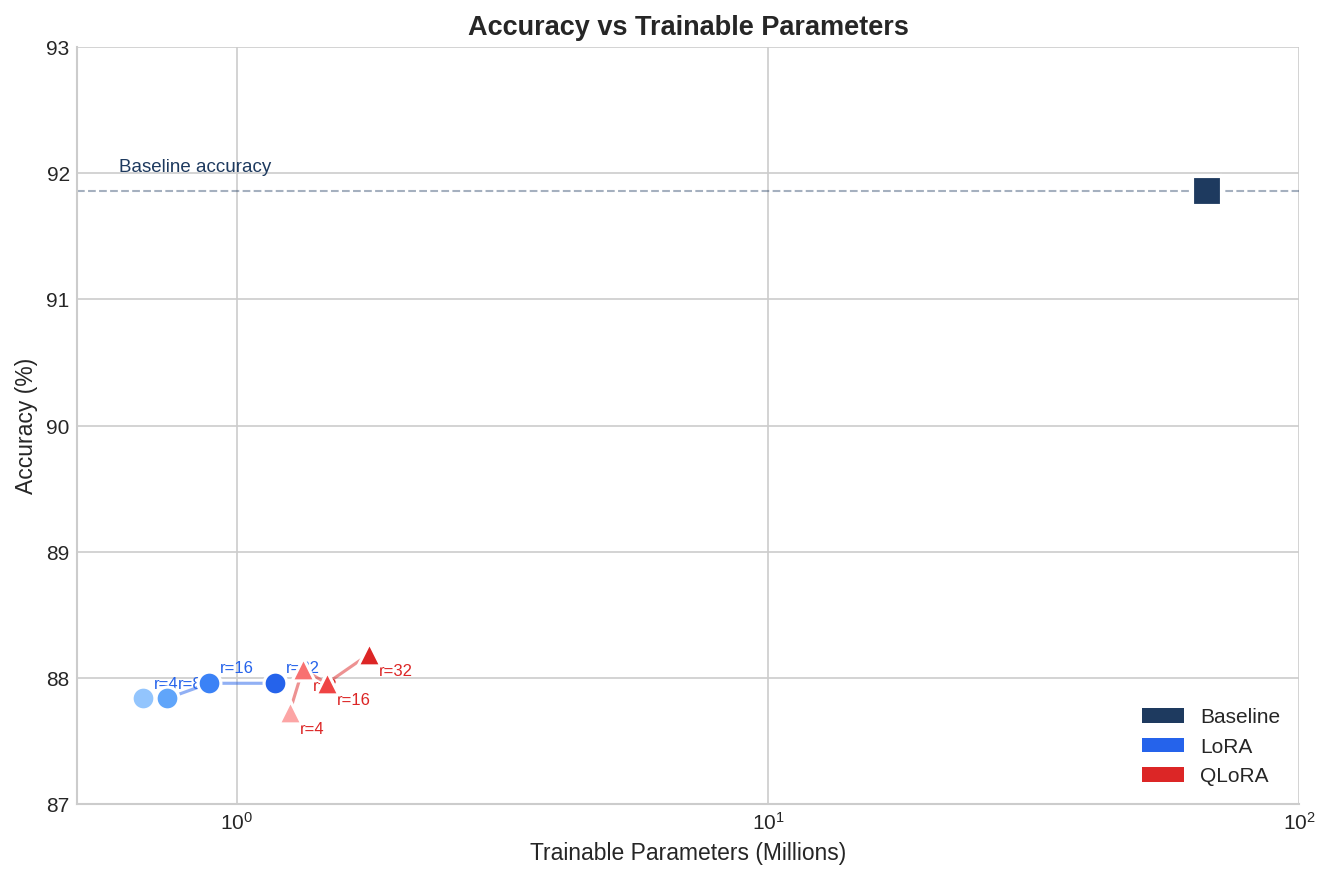

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

# Baseline
ax.scatter(baseline['trainable_params']/1e6, baseline['accuracy'], s=200, c=COLORS['baseline'],
           marker='s', edgecolors='white', linewidths=2, zorder=5, label='Baseline')

# LoRA with connecting line
ax.plot(df_lora['trainable_params']/1e6, df_lora['accuracy'], '-', color=COLORS['lora'], alpha=0.5, zorder=2)
for i, row in df_lora.iterrows():
    ax.scatter(row['trainable_params']/1e6, row['accuracy'], s=120, c=LORA_SHADES[i],
               marker='o', edgecolors='white', linewidths=1.5, zorder=4)
    ax.annotate(f"r={row['rank']}", xy=(row['trainable_params']/1e6, row['accuracy']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, color=COLORS['lora'])

# QLoRA with connecting line
ax.plot(df_qlora['trainable_params']/1e6, df_qlora['accuracy'], '-', color=COLORS['qlora'], alpha=0.5, zorder=2)
for i, row in df_qlora.iterrows():
    ax.scatter(row['trainable_params']/1e6, row['accuracy'], s=120, c=QLORA_SHADES[i],
               marker='^', edgecolors='white', linewidths=1.5, zorder=4)
    ax.annotate(f"r={row['rank']}", xy=(row['trainable_params']/1e6, row['accuracy']),
                xytext=(5, -10), textcoords='offset points', fontsize=8, color=COLORS['qlora'])

ax.set_xlabel('Trainable Parameters (Millions)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy vs Trainable Parameters')
ax.set_xscale('log')
ax.set_xlim(0.5, 100)
ax.set_ylim(87, 93)

# Reference line at baseline accuracy
ax.axhline(y=baseline['accuracy'], color=COLORS['baseline'], linestyle='--', alpha=0.4, linewidth=1)
ax.text(0.6, baseline['accuracy'] + 0.15, 'Baseline accuracy', fontsize=9, color=COLORS['baseline'])

# Legend
legend_elements = [
    Patch(facecolor=COLORS['baseline'], label='Baseline'),
    Patch(facecolor=COLORS['lora'], label='LoRA'),
    Patch(facecolor=COLORS['qlora'], label='QLoRA'),
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('accuracy_vs_params_scaling.png')
plt.show()

---
## Summary Tables

In [ ]:
# Create comprehensive comparison table
all_data = []

all_data.append({
    'Method': 'Baseline',
    'Rank': '-',
    'Accuracy (%)': f"{baseline['accuracy']:.2f}",
    'Memory (MB)': f"{baseline['mem_torch_mb']:.0f}",
    'Trainable Params': f"{baseline['trainable_params']/1e6:.2f}M",
    '% of Total': '100.0%',
    'Param Efficiency': f"{baseline['param_efficiency']:.2f}",
})

for _, row in df_lora.iterrows():
    all_data.append({
        'Method': 'LoRA',
        'Rank': int(row['rank']),
        'Accuracy (%)': f"{row['accuracy']:.2f}",
        'Memory (MB)': f"{row['mem_torch_mb']:.0f}",
        'Trainable Params': f"{row['trainable_params']/1e6:.2f}M",
        '% of Total': f"{row['trainable_pct']:.2f}%",
        'Param Efficiency': f"{row['param_efficiency']:.2f}",
    })

for _, row in df_qlora.iterrows():
    all_data.append({
        'Method': 'QLoRA',
        'Rank': int(row['rank']),
        'Accuracy (%)': f"{row['accuracy']:.2f}",
        'Memory (MB)': f"{row['mem_torch_mb']:.0f}",
        'Trainable Params': f"{row['trainable_params']/1e6:.2f}M",
        '% of Total': f"{row['trainable_pct']:.2f}%",
        'Param Efficiency': f"{row['param_efficiency']:.2f}",
    })

comparison_df = pd.DataFrame(all_data)
print("Full Comparison Table:")
print(comparison_df.to_string(index=False))

---

## Key Findings

| Metric | Baseline | LoRA (r=16) | QLoRA (r=32) |
|--------|----------|-------------|---------------|
| **Accuracy** | 91.86% | 87.96% | 88.19% |
| **Memory** | 1,306 MB | 814 MB (-38%) | 696 MB (-47%) |
| **Trainable Params** | 67.0M (100%) | 0.89M (1.3%) | 1.77M (3.7%) |
| **Param Efficiency** | 1.37 | 99.1 (72x) | 49.7 (36x) |

**Takeaways:**
1. **Accuracy gap is real**: Full fine-tuning outperforms PEFT by ~3.7-3.9% on DistilBERT
2. **Memory savings are significant**: QLoRA achieves 47% memory reduction vs baseline
3. **LoRA is most parameter-efficient**: 72x better accuracy-per-parameter than baseline
4. **QLoRA scales better with rank**: Continued accuracy gains up to r=32, unlike LoRA which plateaus at r=16
5. **Deployment recommendation**: Use QLoRA for memory-constrained environments; use full fine-tuning if accuracy is critical and compute is available